In [1]:
##### MODULES
import os
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.dates
import matplotlib.patches
import datetime as dt
import ast

## custom modules
# import sys  
# sys.path.append('../../scripts')

from import_data import *
from clean_data import *
from mappings import *
from plotting import *
from report import *
from helper import *

##### OPTIONS
pd.options.mode.chained_assignment = None

# autoreload external modules after saving changes to disk
%reload_ext autoreload
%autoreload 2

##### DIRECTORIES
proj_dir = Path('.') / '..' / '..'
source_data_dir = proj_dir/'data'/'source'
clean_data_dir =  proj_dir/'data'/'clean'
viz_dir = proj_dir/'viz'

In [2]:
import feather

# Import 

In [4]:
p = clean_data_dir / 'data_merge.ftr'
df = pd.read_feather(p)

In [15]:
inspect = df.sort_values("id_new").head(1000)

In [13]:
df.shape

(735555, 11)

In [ ]:
df.head()

,index,id,phq,date,AWAKE,DEEP,LIGHT,REM,total,id_new,time
0,0,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.000000,0.0,0.000000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 20
1,1,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.000000,0.0,0.000000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 21
2,2,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.100000,0.000000,0.000000,0.0,0.100000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 22
3,3,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.133333,0.283333,0.566667,0.0,0.983333,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 23
4,4,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.091667,0.0,0.091667,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 0


# Extract 

In [ ]:
df.loc[(df['id']=='bf3defd7-2a52-4557-8202-9d887957e109')&(df['phq']>10)].value_counts('id_new').head(1)

id_new
bf3defd7-2a52-4557-8202-9d887957e109_2019-02-04    150
dtype: int64

In [ ]:
df.loc[df['id_new']=='bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21'] # nrow=15

,index,id,phq,date,AWAKE,DEEP,LIGHT,REM,total,id_new,time,target
0,0,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.000000,0.0,0.000000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 20,True
1,1,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.000000,0.0,0.000000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 21,True
2,2,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.100000,0.000000,0.000000,0.0,0.100000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 22,True
3,3,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.133333,0.283333,0.566667,0.0,0.983333,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 23,True
4,4,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.091667,0.0,0.091667,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 0,True
5,5,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.000000,0.0,0.000000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 1,True
6,6,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.000000,0.0,0.000000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 2,True
7,7,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.000000,0.0,0.000000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 3,True
8,8,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.000000,0.0,0.000000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 4,True
9,9,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.000000,0.0,0.000000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 5,True


In [ ]:
show = df.loc[df['id_new']=='6fcdd023-6388-4650-a30d-8311015fc731_2019-05-08'] # non-depressed
show2 = df.loc[df['id_new']=='bf3defd7-2a52-4557-8202-9d887957e109_2019-02-04'] # depressed, same subject


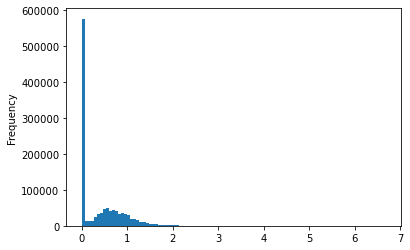

In [ ]:

p = clean_data_dir / 'data_tab.ftr'
data_tab = pd.read_feather(p)
data_tab['total'].plot.hist(bins=100);

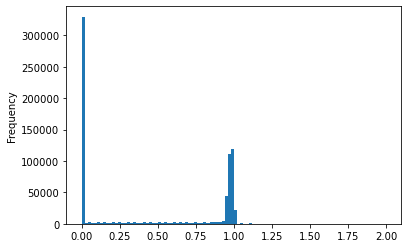

In [ ]:
df['total'].plot.hist(bins=100);

In [ ]:
df.loc[df['total'] > 1].shape[0] / df.shape[0]

0.012734601763294382

In [ ]:
data_merge.value_counts('id_new')

id_new
6fcdd023-6388-4650-a30d-8311015fc731_2019-05-08    240
6b52c798-bf6e-4512-af0d-98e39939fd37_2019-07-17    240
6cc7ed37-5b98-45ab-a911-d27a0f2522f8_2019-05-15    240
6cc7ed37-5b98-45ab-a911-d27a0f2522f8_2019-05-01    240
6cc7ed37-5b98-45ab-a911-d27a0f2522f8_2019-04-17    240
                                                  ... 
3a2ee5f7-96b5-47d6-886f-2ad6031abc1f_2020-01-15     15
8c40fe95-9e9d-4e93-a862-83bb86fc6b73_2019-12-04     15
8e0e62d2-cad4-454d-88e2-2824323012d5_2019-06-10     15
392c8ea4-c602-4ece-b25d-cd8e6d9f8c3e_2019-07-12     15
d7ff9469-0afb-4c87-a711-38dc967085c2_2019-09-10     15
Length: 3854, dtype: int64

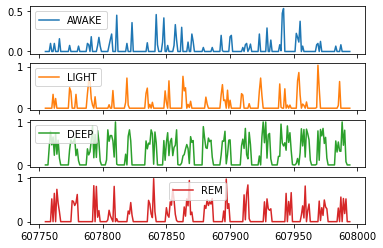

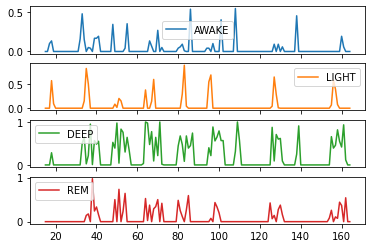

In [ ]:
show[['AWAKE','LIGHT','DEEP','REM']].plot.line(subplots=True);
# example input with one label

show2[['AWAKE','LIGHT','DEEP','REM']].plot.line(subplots=True);

In [ ]:
show['phq']

607755    2.0
607756    2.0
607757    2.0
607758    2.0
607759    2.0
         ... 
607990    2.0
607991    2.0
607992    2.0
607993    2.0
607994    2.0
Name: phq, Length: 240, dtype: float64

# Sample 

In [ ]:
df['target'] = df['phq'] > 10

{'f9cb1634-4766-462b-9891-af1648c695f2_2020-01-24',
 '35b385d8-c28c-40ed-8878-58815c29fb37_2019-11-29',
 '16aa01b8-adfa-4bc6-838e-8d2c0e0004c2_2018-12-14',
 '0370715e-6496-45c9-be84-a2009897c50a_2019-05-27',
 '519ca7a0-a77a-42d3-b9f3-ebe8c737c444_2019-10-09',
 'deeeadb9-ead2-42c3-8efe-afebf1f08f13_2020-01-18',
 '6b52c798-bf6e-4512-af0d-98e39939fd37_2019-12-04',
 '598e3046-ff5f-430f-8d04-02a7d7f02f5c_2019-08-21',
 'f9cb1634-4766-462b-9891-af1648c695f2_2018-09-17',
 '4136766d-01b8-4ede-8633-caaf414b53ca_2020-01-24',
 'dafecf82-ed31-492a-ae1a-635382d76357_2019-12-27',
 '447d21a7-5a7a-4597-ab0e-4bd7c5041e93_2019-09-20',
 'c24af867-50e6-46cd-b639-de4ed363fcd2_2019-06-24',
 '007751c5-d7ad-4bec-a58f-abf32500e2ae_2019-11-27',
 '50eb07bc-9451-44a4-8373-fe78c182b92e_2018-12-20',
 'f9cb1634-4766-462b-9891-af1648c695f2_2020-01-10',
 '4db6269c-0677-46c4-b021-fa4b87600696_2019-10-30',
 '59920508-90c8-47a6-9a3f-3cc983f767d8_2019-12-16',
 '929e0e36-8b80-4749-8c5e-3c540061d52a_2019-07-23',
 '8c40fe95-9

In [ ]:
import random

random.seed(123)
id_select = (
    random.sample(set(df.loc[df['target']==True, 'id_new'].unique()), 5) + 
    random.sample(set(df.loc[df['target']==False, 'id_new'].unique()), 5)
)
df2 = df.loc[df['id_new'].isin(id_select)]


report_preprocessed(df2);

In [ ]:
report_preprocessed(df);

df2.shape=(735555, 12)
target
False    2129
True     1725
dtype: int64
target
False    55.24%
True     44.76%
dtype: object
target
False    414000
True     321555
dtype: int64
target
False    56.28%
True     43.72%
dtype: object


In [ ]:
df2.head(20)

,index,id,phq,date,AWAKE,DEEP,LIGHT,REM,total,id_new,time,target
204495,3996360,705dc0b0-7268-4fbd-8331-78dfb42e26a2,7.0,2019-04-22,0.000000,0.000000,0.000000,0.000000,0.000000,705dc0b0-7268-4fbd-8331-78dfb42e26a2_2019-05-07,2019-04-22 20,False
204496,3996361,705dc0b0-7268-4fbd-8331-78dfb42e26a2,7.0,2019-04-22,0.025000,0.000000,0.000000,0.000000,0.025000,705dc0b0-7268-4fbd-8331-78dfb42e26a2_2019-05-07,2019-04-22 21,False
204497,3996362,705dc0b0-7268-4fbd-8331-78dfb42e26a2,7.0,2019-04-22,0.116667,0.491667,0.375000,0.000000,0.983333,705dc0b0-7268-4fbd-8331-78dfb42e26a2_2019-05-07,2019-04-22 22,False
204498,3996363,705dc0b0-7268-4fbd-8331-78dfb42e26a2,7.0,2019-04-22,0.075000,0.850000,0.058333,0.000000,0.983333,705dc0b0-7268-4fbd-8331-78dfb42e26a2_2019-05-07,2019-04-22 23,False
204499,3996364,705dc0b0-7268-4fbd-8331-78dfb42e26a2,7.0,2019-04-22,0.000000,0.991667,0.450000,0.000000,1.441667,705dc0b0-7268-4fbd-8331-78dfb42e26a2_2019-05-07,2019-04-22 0,False
204500,3996365,705dc0b0-7268-4fbd-8331-78dfb42e26a2,7.0,2019-04-22,0.000000,0.958333,0.033333,0.000000,0.991667,705dc0b0-7268-4fbd-8331-78dfb42e26a2_2019-05-07,2019-04-22 1,False
204501,3996366,705dc0b0-7268-4fbd-8331-78dfb42e26a2,7.0,2019-04-22,0.000000,0.716667,0.000000,0.241667,0.958333,705dc0b0-7268-4fbd-8331-78dfb42e26a2_2019-05-07,2019-04-22 2,False
204502,3996367,705dc0b0-7268-4fbd-8331-78dfb42e26a2,7.0,2019-04-22,0.000000,0.825000,0.000000,0.166667,0.991667,705dc0b0-7268-4fbd-8331-78dfb42e26a2_2019-05-07,2019-04-22 3,False
204503,3996368,705dc0b0-7268-4fbd-8331-78dfb42e26a2,7.0,2019-04-22,0.000000,0.866667,0.116667,0.000000,0.983333,705dc0b0-7268-4fbd-8331-78dfb42e26a2_2019-05-07,2019-04-22 4,False
204504,3996369,705dc0b0-7268-4fbd-8331-78dfb42e26a2,7.0,2019-04-22,0.058333,0.925000,0.000000,0.000000,0.983333,705dc0b0-7268-4fbd-8331-78dfb42e26a2_2019-05-07,2019-04-22 5,False


In [ ]:
ts, y = generate_ts_y(df)

from tsfresh import extract_features
extracted_features = extract_features(ts, column_id="id_new", column_sort="index")

Feature Extraction: 100%|██████████| 20/20 [24:58<00:00, 74.95s/it]  


In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

Export

In [ ]:
p = clean_data_dir / 'fsMar01' / 'feat_tsfresh_all.ftr'
extracted_features.reset_index(drop=True).to_feather(p)

p = clean_data_dir / 'fsMar01' / 'feat_tsfresh_select.ftr'
features_filtered.reset_index(drop=True).to_feather(p)

In [ ]:
fs = features_filtered.copy() # feature selection

# MODELLING FROM SELECTED FEATURES

In [15]:
### import
p = clean_data_dir / 'fsMar01' / 'feat_tsfresh_all.ftr'
fs = pd.read_feather(p)

In [19]:
fs.shape[1]

3156

# Explore features

In [20]:
import seaborn as sns

testdf = fs[fs.columns[0:100]]

features = testdf.columns
for i,feat in enumerate(features):
    print(i)
    feat = "DEEP__cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)"
    subset = pd.concat([testdf[[feat]].reset_index(drop=True), y.reset_index(drop=True)], axis=1)

    ### Step 1: boxplot
    ### Step 2: mixed effects boxplot
        


0


KeyError: "None of [Index(['DEEP__cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)'], dtype='object')] are in the [columns]"

# Random forest with 5-fold CV

### Lib

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


### Params

In [ ]:
RANDOM_SEED = 123
N_JOBS = -1 # all possible processors

Training Features Shape: (2697, 443)
    Training Labels Shape: (2697,)
    Testing Features Shape: (1157, 443)
    Testing Labels Shape: (1157,)


### Split

In [ ]:

from sklearn.model_selection import train_test_split # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fs, y, test_size = 0.3, random_state = RANDOM_SEED)
report_train_test_split(X_train, X_test, y_train, y_test)

### Create the model with 100 trees

In [ ]:

rfc = RandomForestClassifier(random_state=RANDOM_SEED)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=N_JOBS)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
### Show best model from CV
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
### Fit with best model
#! modify if necessary
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)

pred=rfc1.predict(X_test)
print(f"Accuracy for Random Forest on CV data: {accuracy_score(y_test,pred)}")


Accuracy for Random Forest on CV data: 0.5782195332757131


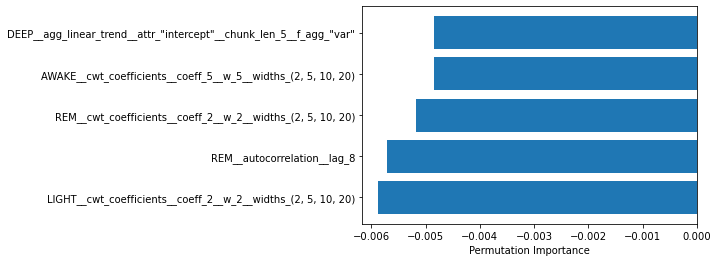

In [ ]:
### Feature importance
from sklearn.inspection import permutation_importance

def plot_imp(classifier, X_train=None, y_train=None, X_test=None, y_test=None, n_features=5):
    ### Default
    imp = classifier.feature_importances_
    sorted_idx = imp.argsort()
    idx = sorted_idx[0:n_features]
    plt.barh(X_train.columns[idx], classifier.feature_importances_[idx]);
    plt.xlabel("Random Forest Feature Importance")

def plot_imp_perm(classifier, X_train=None, y_train=None, X_test=None, y_test=None, n_features=5):

    ### Permutation importance
    perm_importance = permutation_importance(classifier, X_test, y_test)
    perm_sorted_idx = perm_importance.importances_mean.argsort()
    perm_idx = perm_sorted_idx[0:n_features]
    plt.barh(X_train.columns[perm_idx], perm_importance.importances_mean[perm_idx]);
    plt.xlabel("Permutation Importance")

    return perm_importance

# plot_imp(rfc1, X_train, y_train, X_test, y_test, n_features=5);
perm_imp = plot_imp_perm(rfc1, X_train, y_train, X_test, y_test, n_features=5);

# LR with 5-fold CV

<AxesSubplot:ylabel='Frequency'>

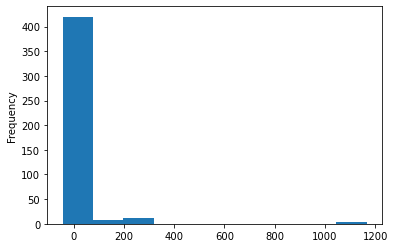

In [ ]:
X_train.median().plot.hist()

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import ElasticNetCV
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

lr = LogisticRegressionCV(cv=5, random_state=RANDOM_SEED, max_iter=1000, penalty='elasticnet', solver='saga').fit(X_scaled, y_train)
pred_lr = lr.predict(X_test)
print(f"Accuracy for logistic regression on CV data: {accuracy_score(y_test,pred_lr)}")

#! CANNOT CONVERGE

In [ ]:
data_merge['hour'].str.match

,index,id,phq,date,AWAKE,DEEP,LIGHT,REM,total,id_new,time
0,0,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.000000,0.000000,0.000000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 20
1,1,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.000000,0.000000,0.000000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 21
2,2,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.100000,0.000000,0.000000,0.000000,0.100000,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 22
3,3,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.133333,0.283333,0.566667,0.000000,0.983333,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 23
4,4,bf3defd7-2a52-4557-8202-9d887957e109,16.0,2019-01-21,0.000000,0.000000,0.091667,0.000000,0.091667,bf3defd7-2a52-4557-8202-9d887957e109_2019-01-21,2019-01-21 0
...,...,...,...,...,...,...,...,...,...,...,...
735550,15815605,09828ab7-192f-4aab-88d5-eb1f5891e367,17.0,2020-01-01,0.000000,0.383333,0.000000,0.583333,0.966667,09828ab7-192f-4aab-88d5-eb1f5891e367_2020-01-01,2020-01-01 6
735551,15815606,09828ab7-192f-4aab-88d5-eb1f5891e367,17.0,2020-01-01,0.000000,0.791667,0.075000,0.100000,0.966667,09828ab7-192f-4aab-88d5-eb1f5891e367_2020-01-01,2020-01-01 7
735552,15815607,09828ab7-192f-4aab-88d5-eb1f5891e367,17.0,2020-01-01,0.000000,0.050000,0.000000,0.000000,0.050000,09828ab7-192f-4aab-88d5-eb1f5891e367_2020-01-01,2020-01-01 8
735553,15815608,09828ab7-192f-4aab-88d5-eb1f5891e367,17.0,2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,09828ab7-192f-4aab-88d5-eb1f5891e367_2020-01-01,2020-01-01 9


In [ ]:
p = clean_data_dir / 'data_merge.ftr'
df = pd.read_feather(p)


In [ ]:
df_select = df.copy()
df_select['hour'] = df_select['time'].str.extract('.+ (\d+)',expand=False)
df_select['hour'].astype(int)
df_select.loc[ (df_select['hour'] > ]

0         20
1         21
2         22
3         23
4          0
          ..
735550     6
735551     7
735552     8
735553     9
735554    10
Name: hour, Length: 735555, dtype: int32

In [ ]:


ts, y = generate_ts_y(df)

from tsfresh import extract_features
extracted_features = extract_features(ts, column_id="id_new", column_sort="index")
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)
p = clean_data_dir / 'fsMar01' / 'feat_tsfresh_all_.ftr'
extracted_features.reset_index(drop=True).to_feather(p)

p = clean_data_dir / 'fsMar01' / 'feat_tsfresh_select.ftr'
features_filtered.reset_index(drop=True).to_feather(p)